In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('yield_df.csv')


In [ ]:
df = pd.read_csv('yield_df.csv')

In [ ]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [ ]:
df.shape

(28242, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [1]:
df

NameError: name 'df' is not defined

In [ ]:
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [ ]:
df.drop_duplicates(inplace=True)

Text(0, 0.5, 'hg/ha_yield')

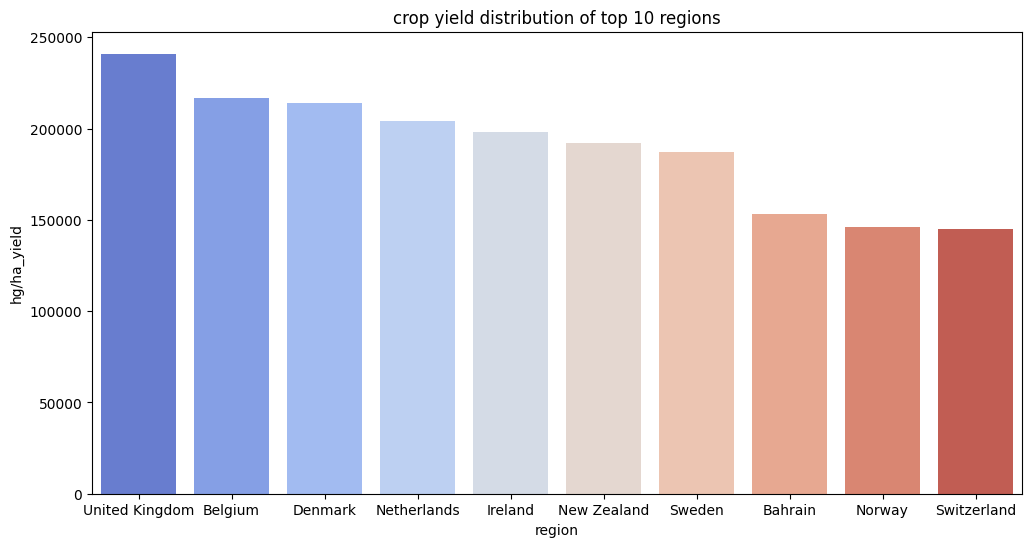

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
yield_top_10_region = df.groupby('Area')['hg/ha_yield'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=yield_top_10_region.index, y=yield_top_10_region.values,palette='coolwarm')
plt.title('crop yield distribution of top 10 regions')
plt.xlabel('region')
plt.ylabel('hg/ha_yield')

Text(0, 0.5, 'hg/ha_yield')

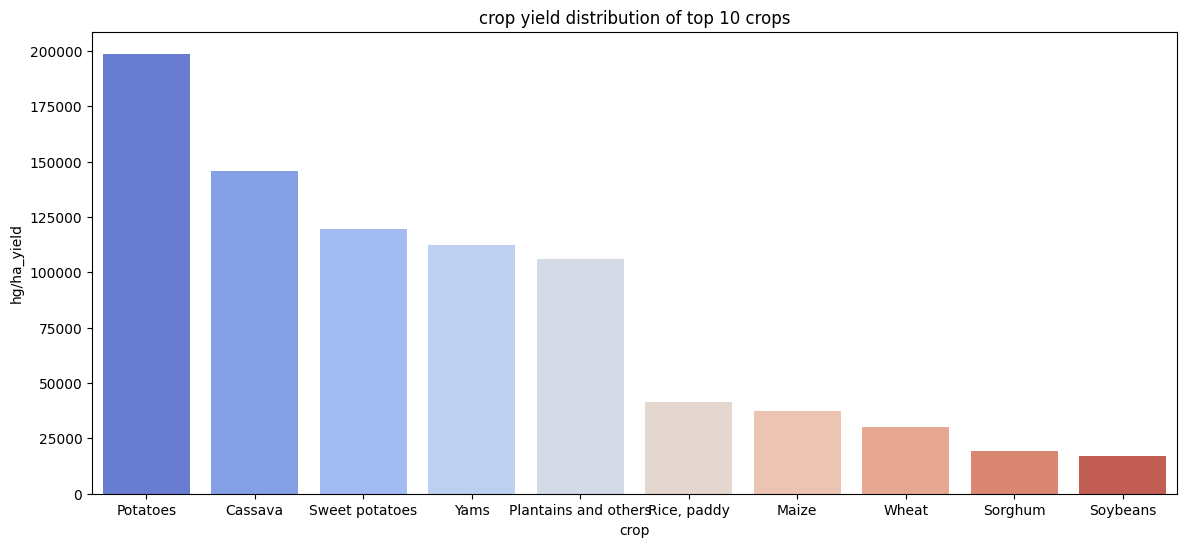

In [ ]:
yield_top_10_crops = df.groupby('Item')['hg/ha_yield'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(14,6))
sns.barplot(x=yield_top_10_crops.index,y=yield_top_10_crops.values,palette='coolwarm')
plt.title('crop yield distribution of top 10 crops')
plt.xlabel('crop')
plt.ylabel('hg/ha_yield')

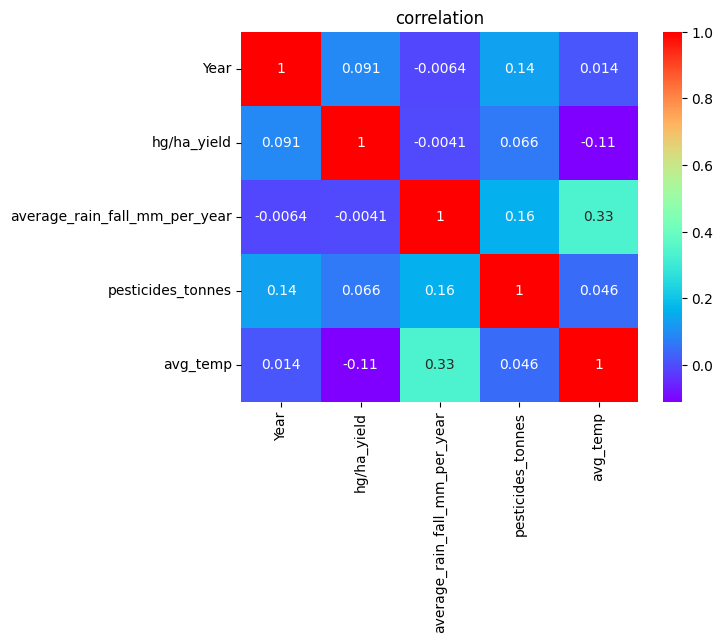

In [ ]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap="rainbow")
plt.title("correlation")
plt.show()

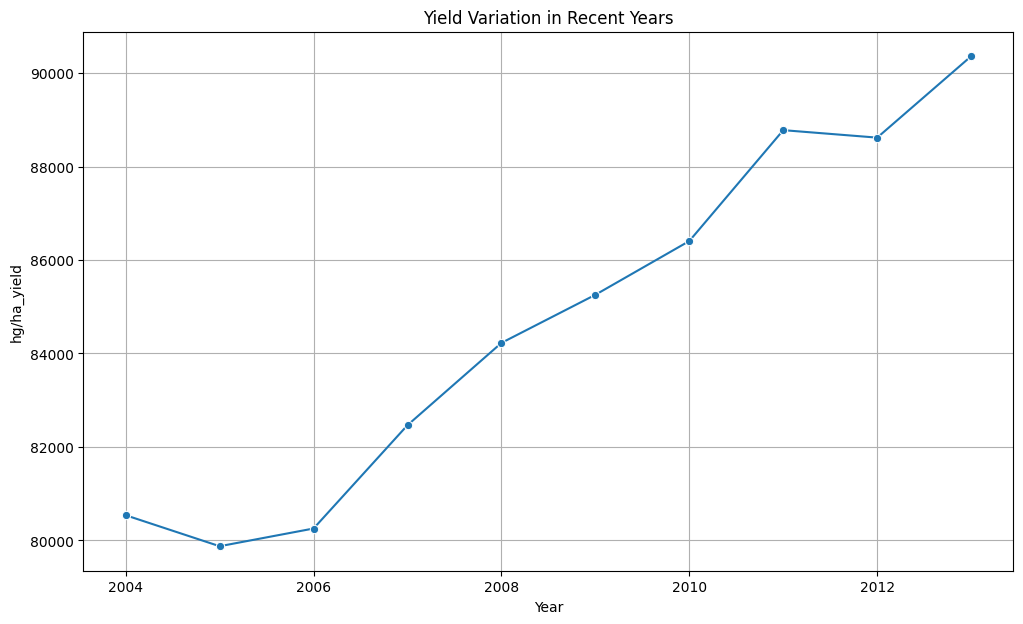

In [ ]:
yield_year = df.groupby('Year')['hg/ha_yield'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,7))
sns.lineplot(x=yield_year.index,y=yield_year.values,marker='o')
plt.title('Yield Variation in Recent Years')
plt.xlabel('Year')
plt.ylabel('hg/ha_yield')
plt.grid(True)
plt.show()

In [ ]:
rainfall_yield = df.groupby('average_rain_fall_mm_per_year')['hg/ha_yield'].mean()
rainfall_yield

,hg/ha_yield
average_rain_fall_mm_per_year,
51.0,114375.304348
56.0,65335.420290
59.0,82455.902174
74.0,86893.130435
83.0,153237.551724
...,...
2666.0,52518.088435
2702.0,83415.843137
2875.0,85322.387097


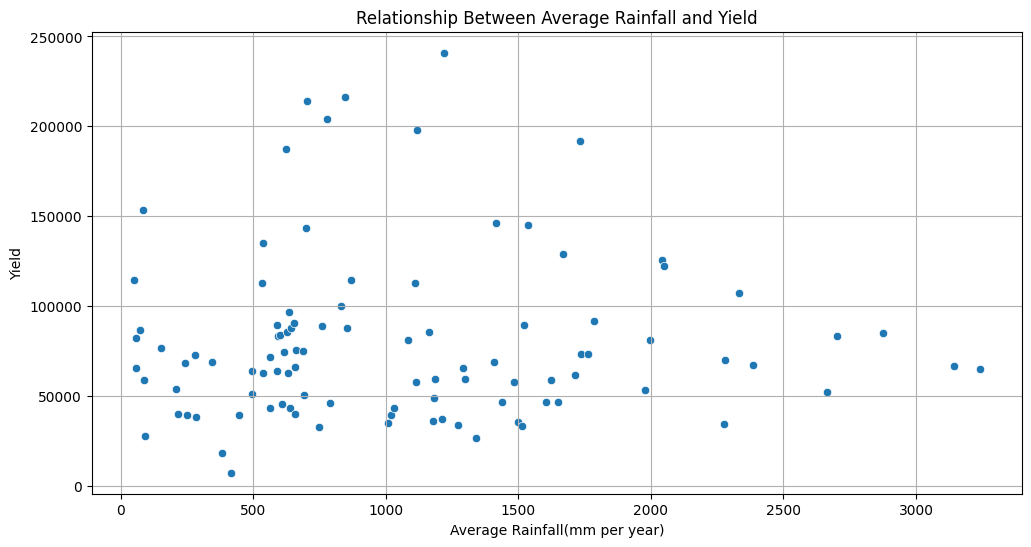

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=rainfall_yield.index,y=rainfall_yield.values)
plt.title('Relationship Between Average Rainfall and Yield')
plt.xlabel('Average Rainfall(mm per year)')
plt.ylabel('Yield')
plt.grid(True)
plt.show()

In [ ]:
df_new = df.rename(columns={
    "average_rain_fall_mm_per_year": "Rainfall",
    "pesticides_tonnes": "Pesticides",
    "avg_temp": "Avg_Temp",
    "hg/ha_yield":"Yield"
})

In [ ]:
from sklearn.preprocessing import LabelEncoder
country = LabelEncoder()
crop = LabelEncoder()
df_new['Country_Encoded'] = country.fit_transform(df_new['Area'])
df_new['Crop_Encoded'] = crop.fit_transform(df_new['Item'])

In [ ]:
X= df_new[['Country_Encoded', 'Crop_Encoded', 'Pesticides', 'Avg_Temp', 'Rainfall']]
y=df_new['Yield']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42,test_size=0.3)
from sklearn.linear_model import LinearRegression
a=LinearRegression()
a.fit(X_train, y_train)
print("Score:", a.score (X_test,y_test))
y_pred=a.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Prediction:",y_pred)
print("MSE:", mean_squared_error(y_test,y_pred))
print("MAE:", mean_absolute_error(y_test,y_pred))
print("R2 score:", r2_score(y_test,y_pred)*100)

Score: 0.0787935408546897
Prediction: [ 93050.82966893  58330.62940205 116583.54800491 ...  93840.30243684
  52781.86195263  36125.4391374 ]
MSE: 6965549435.76357
MAE: 62688.412423875045
R2 score: 7.87935408546897


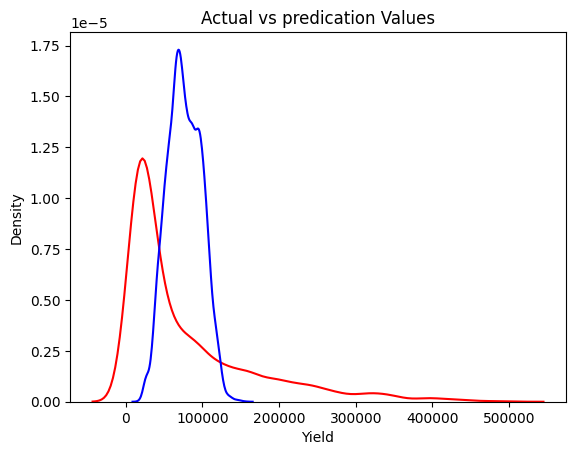

In [ ]:
ax1=sns.distplot(y_test,color='r', hist=False, label='Acual value')
sns.distplot(y_pred, color='b', hist=False, label='predication', ax=ax1)
plt.title("Actual vs predication Values")
plt.show()
plt.close()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(X_train,y_train)
print("Score:",b.score(X_test,y_test))
y_pred=b.predict(X_test)
print("Prediction:",y_pred)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MSE:", mean_squared_error(y_test,y_pred))
print("MAE:", mean_absolute_error(y_test,y_pred))
print("R2 score:", r2_score(y_test,y_pred)*100)

Score: 0.9681107030783023
Prediction: [100327.12  15178.85  79435.61 ...  50124.34   1820.27  21365.43]
MSE: 241125615.1915352
MAE: 6485.403891938296
R2 score: 96.81107030783022


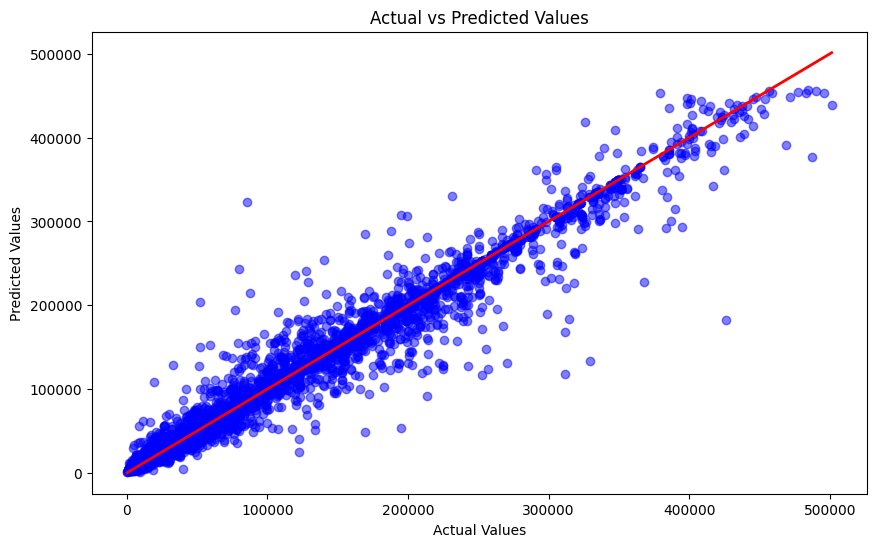

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(X_train,y_train)
print("Score:",b.score(X_test,y_test))
y_pred=b.predict(X_test)
print("Prediction:",y_pred)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MSE:", mean_squared_error(y_test,y_pred))
print("MAE:", mean_absolute_error(y_test,y_pred))
print("R2 score:", r2_score(y_test,y_pred)*100)

Score: 0.9506067127833407
Prediction: [94072. 14863. 89499. ... 58596.  1341. 19466.]
MSE: 373479126.7331298
MAE: 7225.651735218509
R2 score: 95.06067127833407


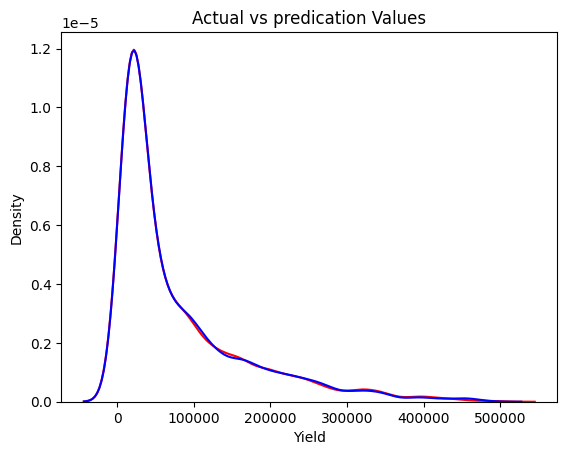

In [ ]:
import warnings
warnings.filterwarnings ('ignore')
ax1=sns.distplot(y_test,color='r', hist=False, label='Acual value')
sns.distplot(y_pred, color='b', hist=False, label='predication', ax=ax1)
plt.title('Actual vs predication Values')
plt.show()
plt.close()